In [153]:
import torch
import torchvision

n_epochs = 10
batch_size_train = 128
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 100

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.Pad(padding=2),
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.0,), (1.0,)),
                             ])),
  batch_size=batch_size_test, shuffle=False)

In [155]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([1000, 1, 32, 32])

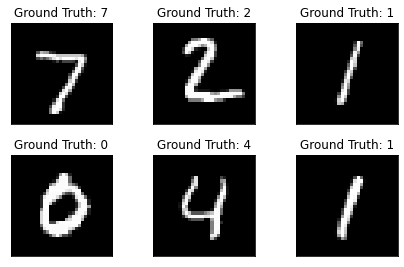

In [156]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

In [115]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [157]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)

In [158]:
network = Net()

network.load_state_dict(torch.load('/content/drive/My Drive/CMPUT328_2020/Week09/Trick/model.pth'))

<All keys matched successfully>

Predicted label: 7
tensor([[-5.6830, -4.8573, -4.1344, -4.2341, -6.9982, -6.3431, -8.8495, -0.0746,
         -4.6455, -4.0319]], grad_fn=<LogSoftmaxBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


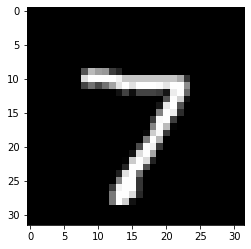

In [144]:
from torch.autograd import Variable

X = Variable(torch.FloatTensor(example_data[0][0]).view((1,1,32,32)).clone(), requires_grad=True)

output = network(example_data[0].view((1,1,32,32)))
val, ind = torch.max(output, 1)
print("Predicted label:",ind.item())
print(output)
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')

tensor([7])
tensor([3])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


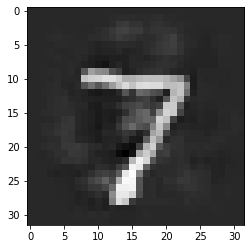

In [159]:
init_val = example_data[0] # inverse of sigmoid
X = Variable(torch.FloatTensor(init_val.view((1,1,32,32)).clone()), requires_grad=True)
optimizer = optim.SGD([X], lr=learning_rate,momentum=momentum)

for i in range(10000):
  optimizer.zero_grad()
  output = network(X) # keep input always between 0 and 1
  val, ind = torch.max(output, 1)
  if ind.item()==3:
    break
  if i%1000==0:
    print(ind)
  loss = F.nll_loss(output, torch.tensor([3]))
  loss.backward()
  optimizer.step()
print(ind)

plt.imshow(X.view((32,32)).detach().numpy(), cmap='gray', interpolation='none')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([7])
tensor([7])
tensor([7])
tensor([3])


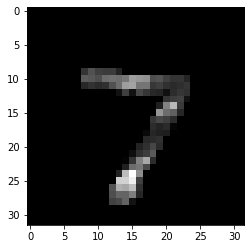

In [160]:
init_val = torch.log(example_data[0][0]+1e-15)/(1.0-example_data[0][0]-1e-15) # inverse of sigmoid
X = Variable(torch.FloatTensor(init_val.view((1,1,32,32)).clone()), requires_grad=True)
optimizer = optim.SGD([X], lr=learning_rate,momentum=momentum)

for i in range(10000):
  optimizer.zero_grad()
  output = network(torch.sigmoid(X)) # keep input always between 0 and 1
  val, ind = torch.max(output, 1)
  if ind.item()==3:
    break
  if i%1000==0:
    print(ind)
  loss = F.nll_loss(output, torch.tensor([3]))
  loss.backward()
  optimizer.step()
print(ind)
plt.imshow(torch.sigmoid(X).view((32,32)).detach().numpy(), cmap='gray', interpolation='none')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([7])
tensor([3])
tensor([[-3.7231, -3.0808, -2.6285, -1.1387, -5.2718, -2.9251, -6.2355, -1.1387,
         -2.6234, -2.4775]], grad_fn=<LogSoftmaxBackward>)


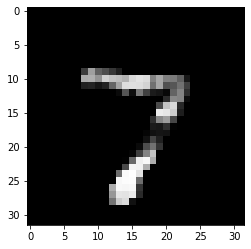

In [181]:
init_val = torch.log(example_data[0][0]+1e-15)/(1.0-example_data[0][0]-1e-15) # inverse of sigmoid
X = Variable(torch.FloatTensor(init_val.view((1,1,32,32)).clone()), requires_grad=True)
optimizer = optim.SGD([X], lr=learning_rate,momentum=momentum)

for i in range(20000):
  optimizer.zero_grad()
  output = network(torch.sigmoid(X)) # keep input always between 0 and 1
  val, ind = torch.max(output, 1)
  if ind.item()==3:
    break
  if i%1000==0:
    print(ind)
  loss = F.nll_loss(output, torch.tensor([3])) + 0.8*1e2*torch.mean((torch.sigmoid(X)-example_data[0].view_as(X))**2)
  loss.backward()
  optimizer.step()
print(ind)

plt.imshow(torch.sigmoid(X).view((32,32)).detach().numpy(), cmap='gray', interpolation='none')

tensor([5])
tensor([3])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


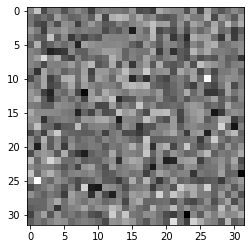

In [173]:
X = Variable(torch.randn((1,1,32,32)), requires_grad=True)
optimizer = optim.SGD([X], lr=learning_rate,momentum=momentum)

for i in range(10000):
  optimizer.zero_grad()
  output = network(X) # keep input always between 0 and 1
  val, ind = torch.max(output, 1)
  if ind.item()==3:
    break
  if i%1000==0:
    print(ind)
  loss = F.nll_loss(output, torch.tensor([3]))
  loss.backward()
  optimizer.step()
print(ind)

plt.imshow(X.view((32,32)).detach().numpy(), cmap='gray', interpolation='none')